<a href="https://colab.research.google.com/github/ryuuunothuman/PCVK_Ganjil_2024/blob/master/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Transformasi Linier Brightness
Formula: *g(x,y) = f(x,y)+b*
*g(x,y)* adalah nilai pixel setelah transformasi, *f(x,y)* adalah nilai brightness

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


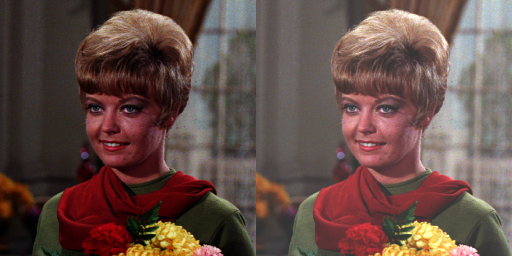

In [1]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

# cara simple tanpa for loop
# brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# Tugas Praktikum


1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

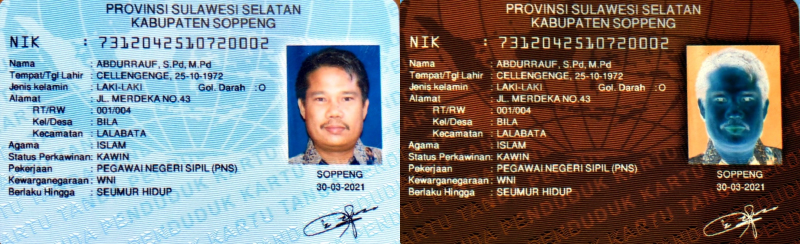

In [8]:
original_ktp = cv.imread('/content/drive/MyDrive/images/KTP7.jpeg')
original_ktp = cv.resize(original_ktp, (0,0), fx=0.5, fy=0.5)

inverse = (255 - original_ktp)
final_frame = cv.hconcat((original_ktp, inverse))
cv2_imshow(final_frame)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

 Mengubah Kontras dan Tingkat Kecerahan Citra 
----------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


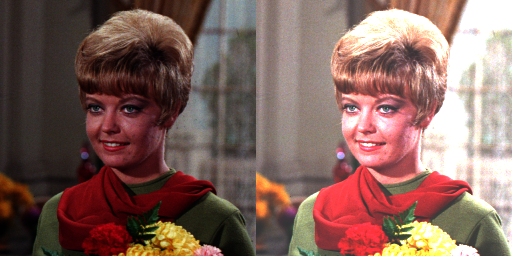

In [31]:
print(' Mengubah Kontras dan Tingkat Kecerahan Citra ')
print('----------------------------------------------')

while True:
  try:
    brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
    if -255 <= brightness <= 255:
      contrast = int(input('Masukkan kontras [1.0 - 3.0]: '))
      if 1.0 <= contrast <= 3.0:
        break
      else:
        print('Persyaratan contrast tidak sesuai!')
    else:
      print('Persyaratan brightness tidak sesuai!')
  except ValueError:
    print('Error, not a number')

# Load the image
original_contrast = cv.imread('/content/drive/MyDrive/images/female.tiff')

# Check if image was loaded correctly
if original_contrast is None:
    print(f'Error: Unable to load image at /content/drive/MyDrive/images/female.tiff')
else:
    # Apply contrast and brightness transformation using OpenCV
    contrast_image = cv.convertScaleAbs(original_contrast, alpha=contrast, beta=brightness)

    # Concatenate original and contrast-adjusted images
    final_frame = cv.hconcat((original_contrast, contrast_image))

    # Display the images
    cv2_imshow(final_frame)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:

Mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------------------------------
Masukkan nilai kecerahan: 50


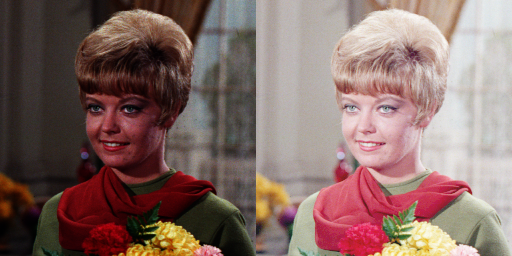

In [34]:
print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('--------------------------------------------------------')

try :
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error: Masukkan nilai yang valid untuk kecerahan.')
  brightness = 0

original_img = cv.imread('/content/drive/MyDrive/images/female.tiff')

if original is None:
  print(f'Error: Unable to load image')
else:
  # Konversi image ke float32 for log transformation
  original_float = np.float32(original)

  # transformasi logarithmic
  c = 255 / np.log(1 + np.max(original_float))
  log_transformed = c * np.log(1 + original_float)

  # Konversi kembali ke uint8
  log_transformed = np.uint8(np.clip(log_transformed, 0, 255))

  final_frame = cv.hconcat((original, log_transformed))

  cv2_imshow(final_frame)

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

a. Averaging


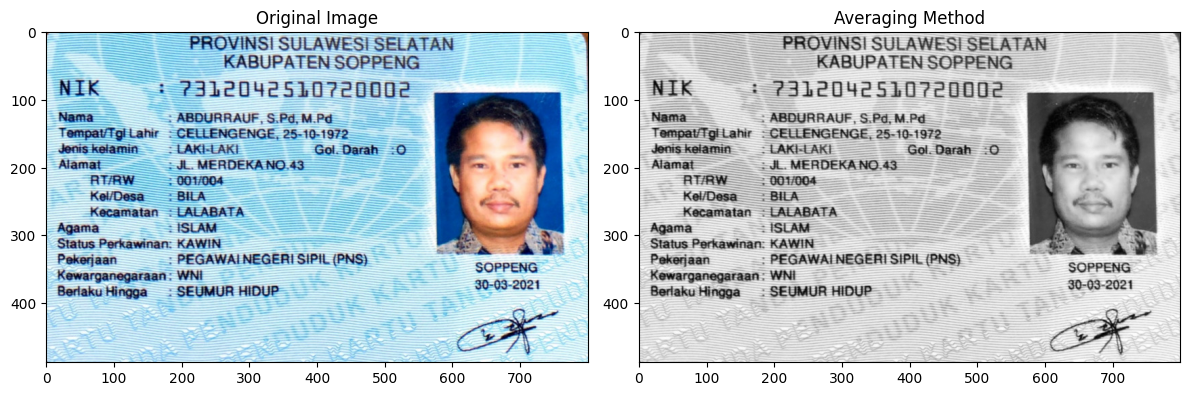

In [48]:
import matplotlib.pyplot as plt

original = cv.imread('/content/drive/MyDrive/images/KTP7.jpeg')

if original is None:
  print(f'Error: Unable to load image')
else:
  # konversi image ke float32 untuk presisi
  original_float = original.astype(np.float32)

  # method averaging
  averaging_gray = np.mean(original_float, axis=2)

  # method lightness
  max_val = np.max(original_float, axis=2)
  min_val = np.min(original_float, axis=2)
  lightness_gray = (max_val + min_val) / 2

  # method luminance
  luminance_gray = 0.299 * original_float[:, :, 2] + 0.587 * original_float[:, :, 1] + 0.114 * original_float[:, :, 0]

  # konversi grayscale image ke uint8
  averaging_gray = np.uint8(np.clip(averaging_gray, 0, 255))
  lightness_gray = np.uint8(np.clip(lightness_gray, 0, 255))
  luminance_gray = np.uint8(np.clip(luminance_gray, 0, 255))

  # Display hasil menggunakan matplotlib
  plt.figure(figsize=(12,8))

  # Original Image
  print('a. Averaging')
  plt.subplot(2, 2, 1)
  plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
  plt.title('Original Image')

  # Averaging Method
  plt.subplot(2, 2, 2)
  plt.imshow(averaging_gray, cmap='gray')
  plt.title('Averaging Method')

  plt.tight_layout()
  plt.show()

b. Lightness


Text(0.5, 1.0, 'Lightness Method')

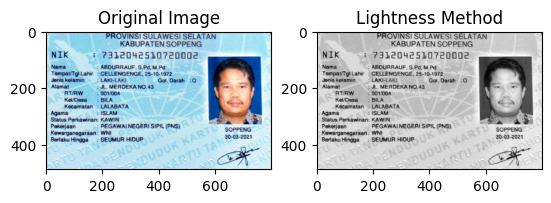

In [45]:
  print('b. Lightness')
  # Original Image
  plt.subplot(2, 2, 1)
  plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
  plt.title('Original Image')

  # Lightness Method
  plt.subplot(2, 2, 2)
  plt.imshow(lightness_gray, cmap='gray')
  plt.title('Lightness Method')

c. Luminance


Text(0.5, 1.0, 'Luminance Method')

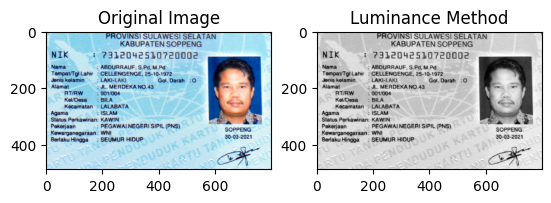

In [47]:
  # Original Image
  print('c. Luminance')
  plt.subplot(2, 2, 1)
  plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
  plt.title('Original Image')

  # Luminance Method
  plt.subplot(2, 2, 2)
  plt.imshow(luminance_gray, cmap='gray')
  plt.title('Luminance Method')